In [123]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [124]:

df = pd.read_csv("cancer_dataset.csv")

In [125]:

df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [126]:

df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [127]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [128]:

df.shape

(10000, 20)

In [129]:

df.describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


In [130]:

df.duplicated().sum()

0

In [131]:

df2 = df.drop(['Patient_ID','Diagnosis_Date','Treatment_Start_Date','Death_Date','Cause_of_Death','Comorbidities'],axis=1)


In [132]:

df2.head(2)

,Age,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Smoking_Status,Ethnicity,Weight,Height
0,69,Female,Emirati,Umm Al Quwain,Liver,II,Radiation,Sheikh Khalifa Hospital,Dr. VO41,Recovered,Non-Smoker,European,61,157
1,32,Male,Emirati,Umm Al Quwain,Leukemia,III,Surgery,Dubai Hospital,Dr. SM31,Recovered,Smoker,South Asian,80,175


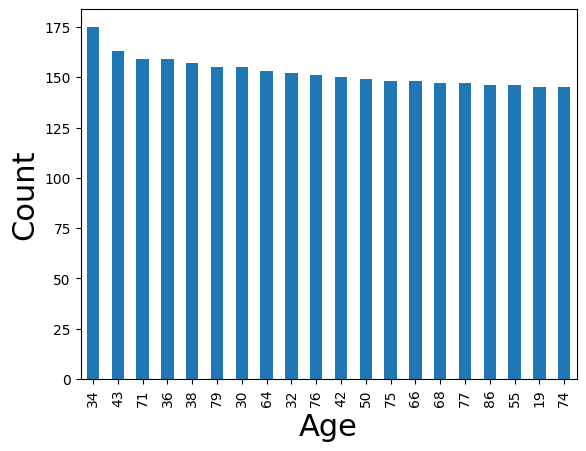

In [133]:
# top 20
df2['Age'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Age',size=22)
plt.ylabel('Count',size=22)
plt.show()

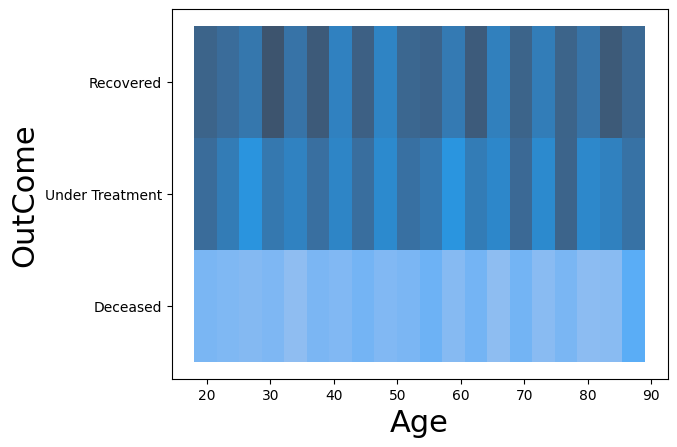

In [134]:

sns.histplot(data=df2,x='Age',y='Outcome',bins=20)
plt.xlabel('Age',size=22)
plt.ylabel('OutCome',size=22)
plt.show()

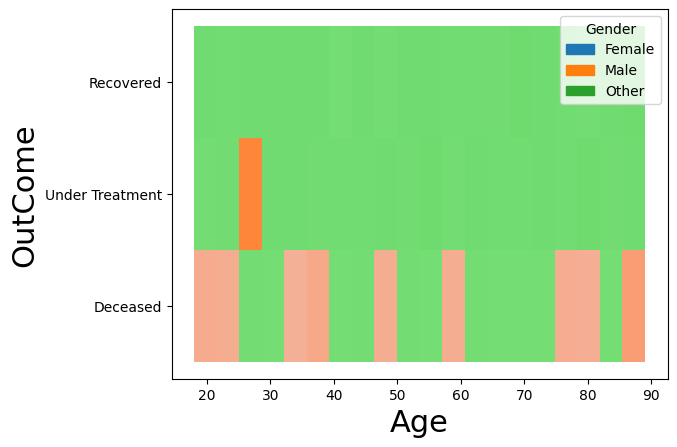

In [135]:

sns.histplot(data=df2,x='Age',y='Outcome',bins=20,hue='Gender')
plt.xlabel('Age',size=22)
plt.ylabel('OutCome',size=22)
plt.show()

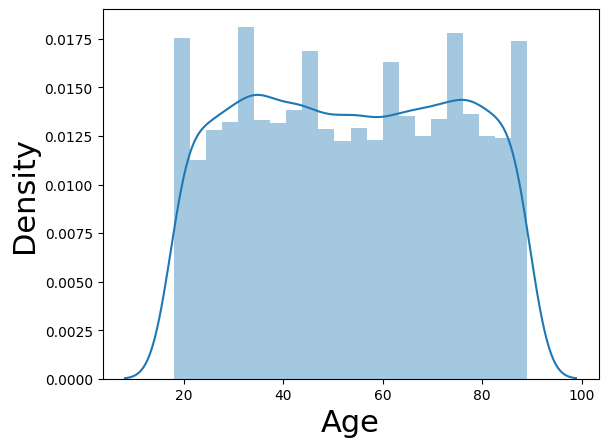

In [136]:

sns.distplot(df2['Age'])
plt.xlabel('Age',size=22)
plt.ylabel('Density',size=22)
plt.show()


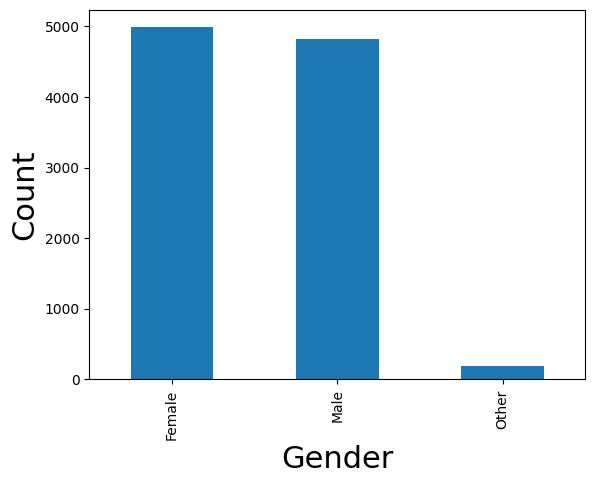

In [137]:

df2['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender',size=22)
plt.ylabel('Count',size=22)
plt.show()


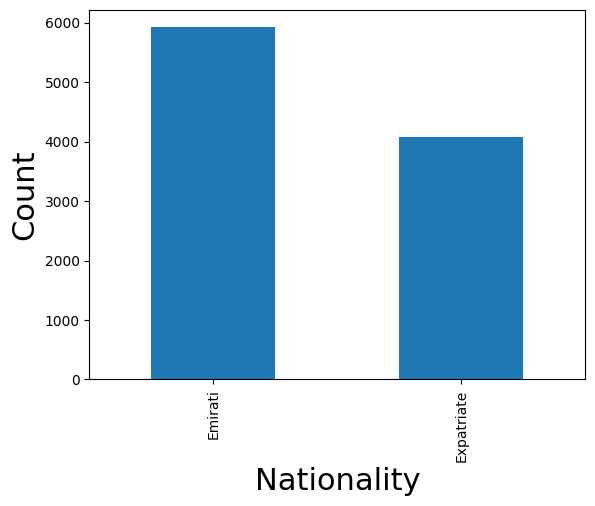

In [138]:

df2['Nationality'].value_counts().plot(kind='bar')
plt.xlabel('Nationality',size=22)
plt.ylabel('Count',size=22)
plt.show()

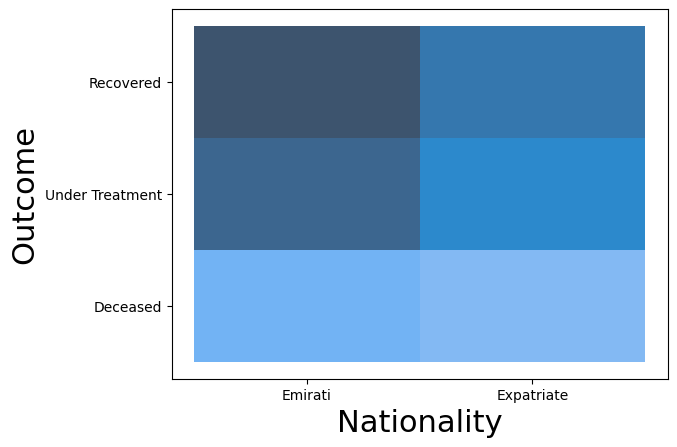

In [139]:

sns.histplot(data=df2,x='Nationality',y='Outcome')
plt.xlabel('Nationality',size=22)
plt.ylabel('Outcome',size=22)
plt.show()

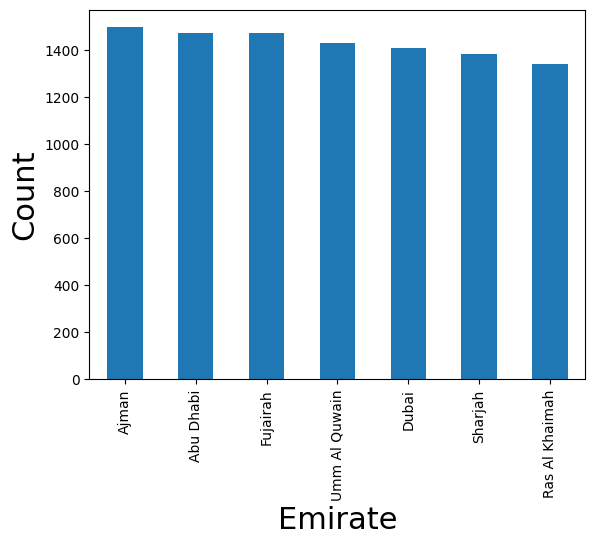

In [140]:

df2['Emirate'].value_counts().plot(kind='bar')
plt.xlabel('Emirate',size=22)
plt.ylabel('Count',size=22)
plt.show()

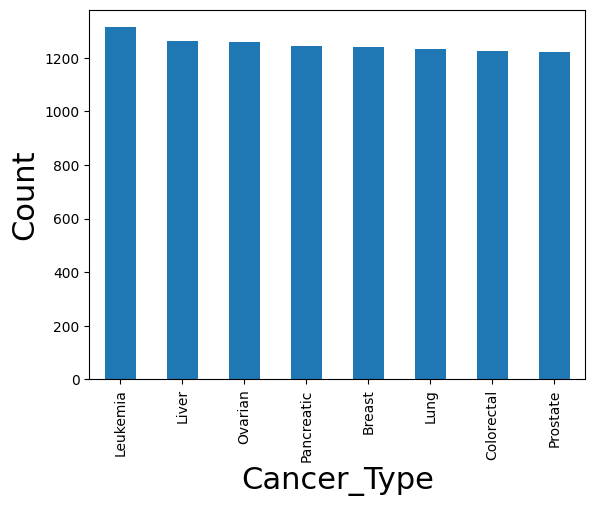

In [141]:

df2['Cancer_Type'].value_counts().plot(kind='bar')
plt.xlabel('Cancer_Type',size=22)
plt.ylabel('Count',size=22)
plt.show()

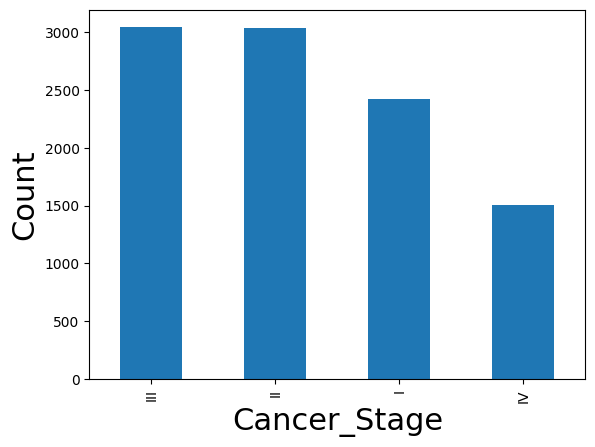

In [142]:

df2['Cancer_Stage'].value_counts().plot(kind='bar')
plt.xlabel('Cancer_Stage',size=22)
plt.ylabel('Count',size=22)
plt.show()

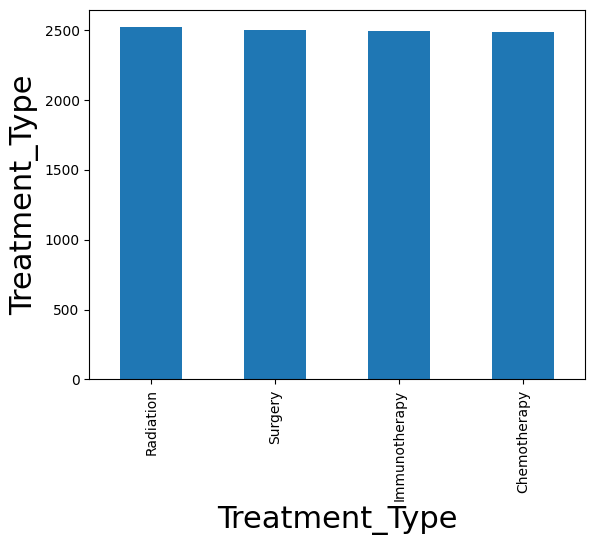

In [143]:

df2['Treatment_Type'].value_counts().plot(kind='bar')
plt.xlabel('Treatment_Type',size=22)
plt.ylabel('Treatment_Type',size=22)
plt.show()

In [144]:

numeric_features = [feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Age', 'Weight', 'Height']

We have 11 categorical features : ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type', 'Hospital', 'Primary_Physician', 'Outcome', 'Smoking_Status', 'Ethnicity']


In [145]:

for col in categorical_features:
    print(df2[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Gender
Female    49.85
Male      48.27
Other      1.88
Name: proportion, dtype: float64
---------------------------
Nationality
Emirati       59.2
Expatriate    40.8
Name: proportion, dtype: float64
---------------------------
Emirate
Ajman             14.97
Abu Dhabi         14.71
Fujairah          14.71
Umm Al Quwain     14.32
Dubai             14.07
Sharjah           13.82
Ras Al Khaimah    13.40
Name: proportion, dtype: float64
---------------------------
Cancer_Type
Leukemia      13.14
Liver         12.63
Ovarian       12.59
Pancreatic    12.43
Breast        12.41
Lung          12.33
Colorectal    12.26
Prostate      12.21
Name: proportion, dtype: float64
---------------------------
Cancer_Stage
III    30.41
II     30.36
I      24.19
IV     15.04
Name: proportion, dtype: float64
---------------------------
Treatment_Type
Radiation        25.19
Surgery          24.98
Immunotherapy    24.97
Chemotherapy     24.86
Name: proportion, dtype: float64
---------------------------
Hospital



# Numerical Features

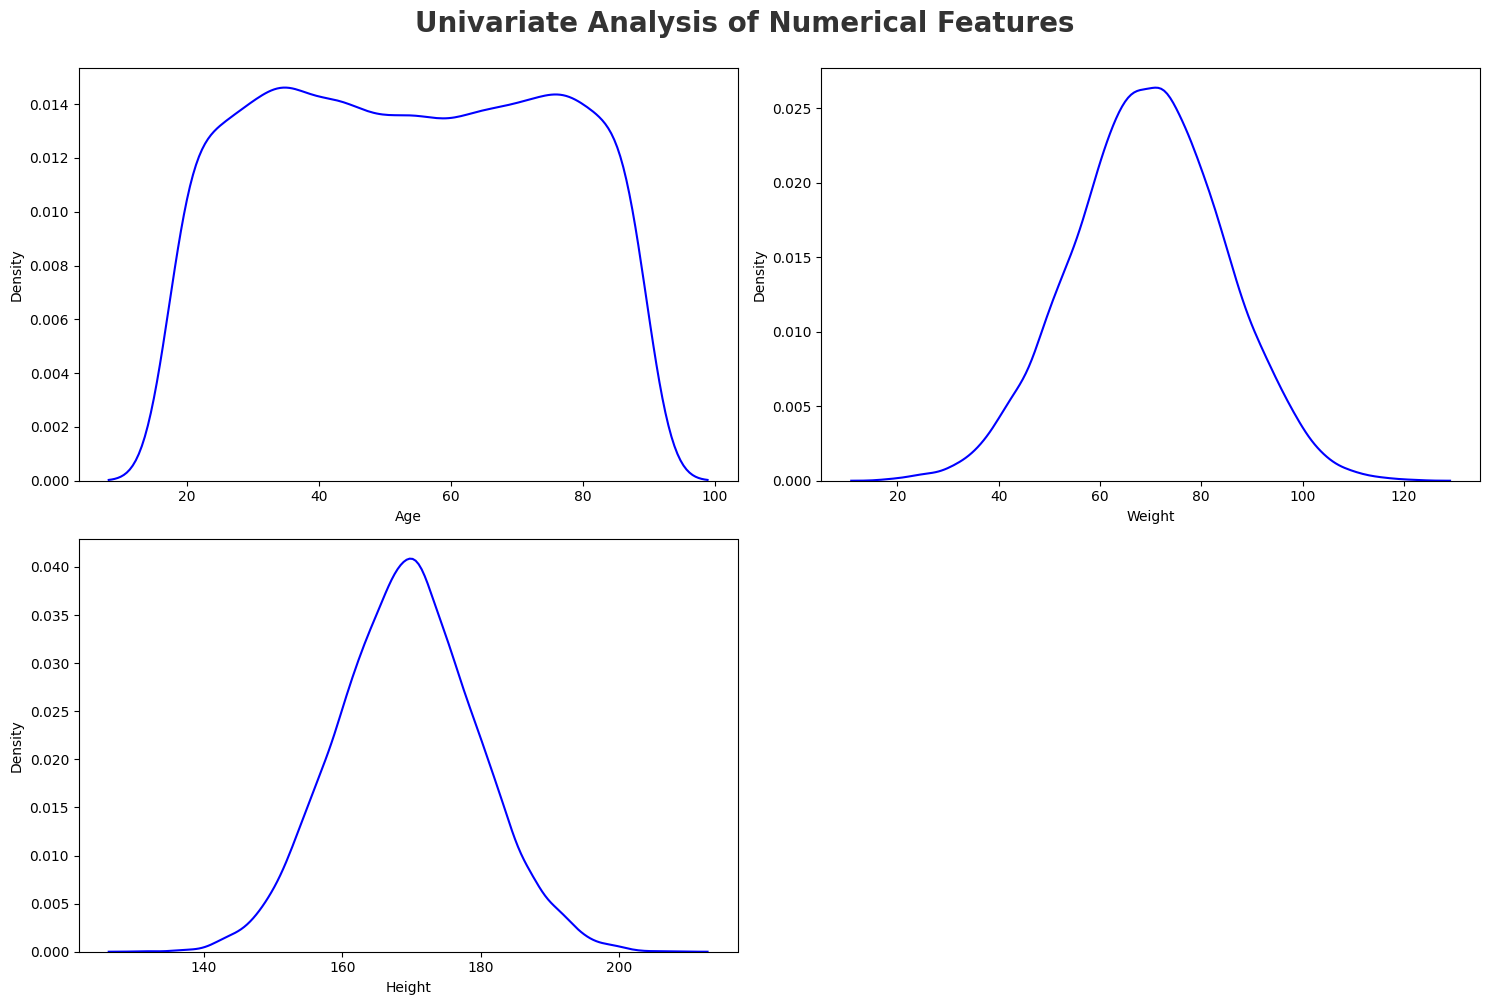

In [146]:

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df2[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

# Categorical Features

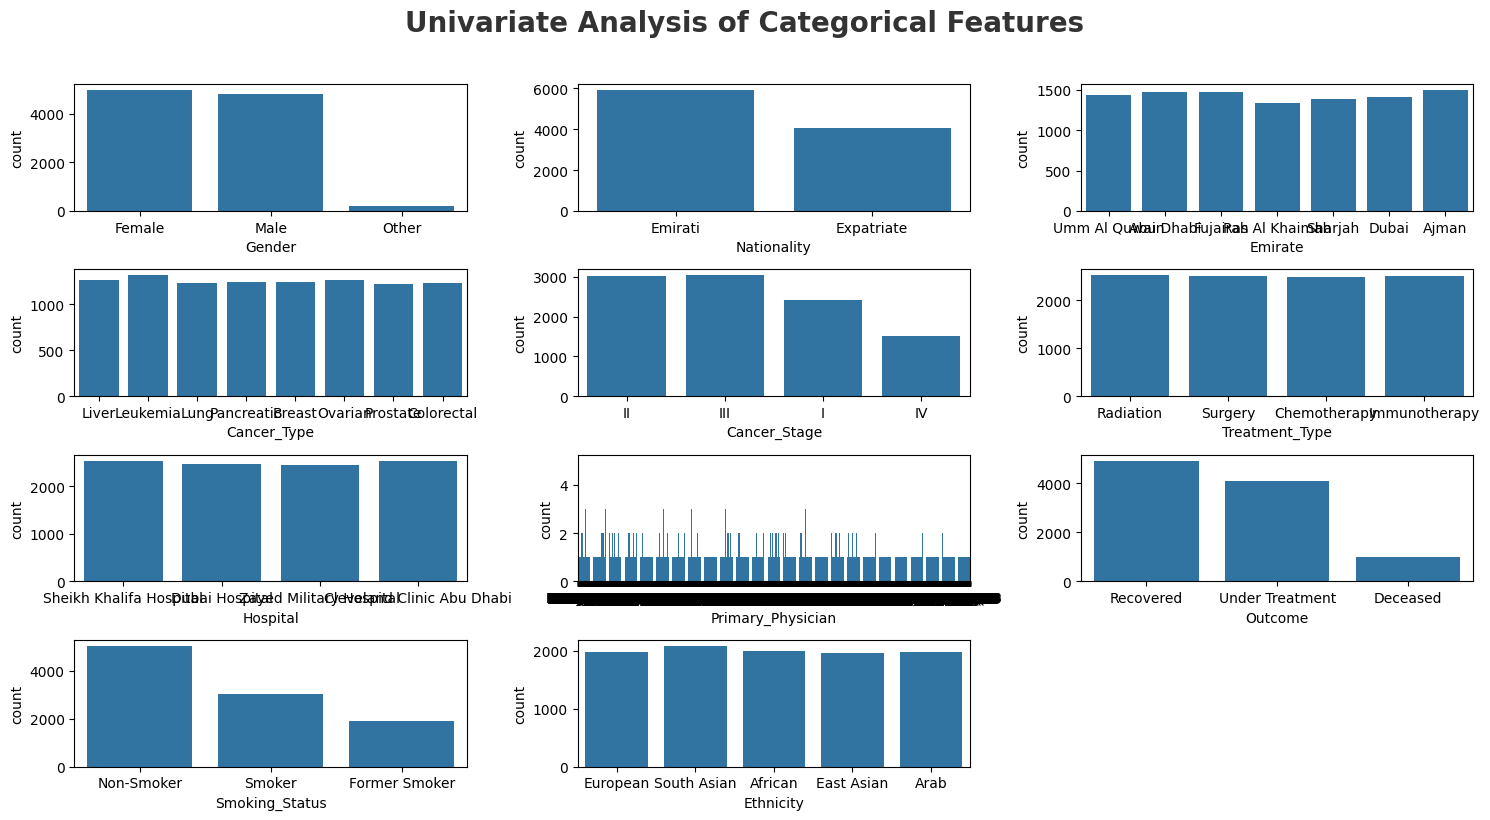

In [147]:
import math

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

n = len(categorical_features)
cols = 3
rows = math.ceil(n / cols)

for i in range(n):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=df2[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# plt.savefig('./images/Univariate_Cat.png')
plt.show()


In [148]:
discrete_features=[feature for feature in numeric_features if len(df2[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df2[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['Age', 'Weight', 'Height']


In [149]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df2['Outcome'], df2[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Gender,Fail to Reject Null Hypothesis
1,Nationality,Fail to Reject Null Hypothesis
2,Emirate,Fail to Reject Null Hypothesis
3,Cancer_Type,Fail to Reject Null Hypothesis
4,Cancer_Stage,Fail to Reject Null Hypothesis
5,Treatment_Type,Fail to Reject Null Hypothesis
6,Hospital,Fail to Reject Null Hypothesis
7,Primary_Physician,Fail to Reject Null Hypothesis
8,Outcome,Reject Null Hypothesis
9,Smoking_Status,Fail to Reject Null Hypothesis


In [150]:
continues_features=[feature for feature in numeric_features if len(df2[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Age', 'Weight', 'Height']


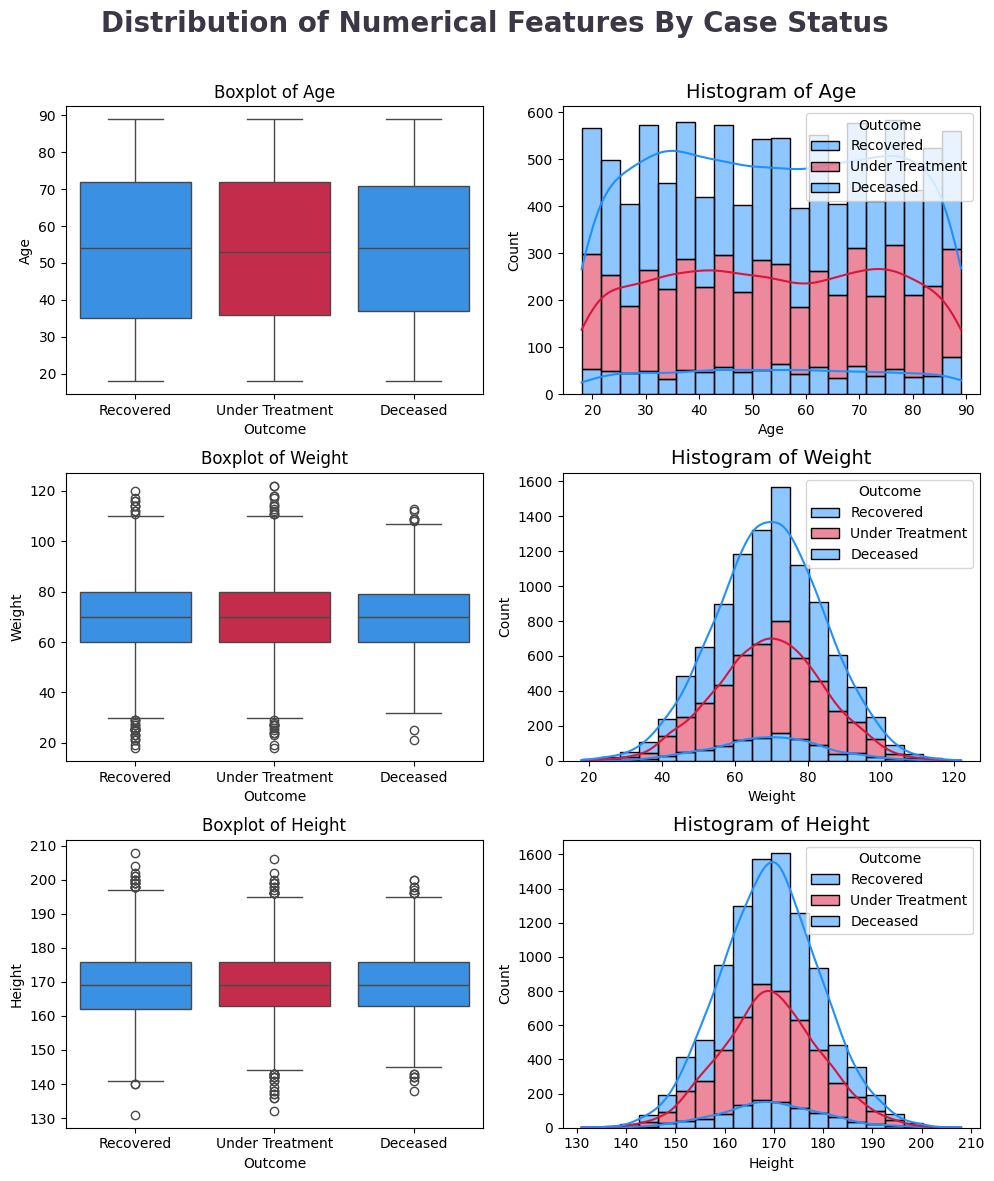

In [151]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df2, x='Outcome', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df2, x=col, hue='Outcome', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

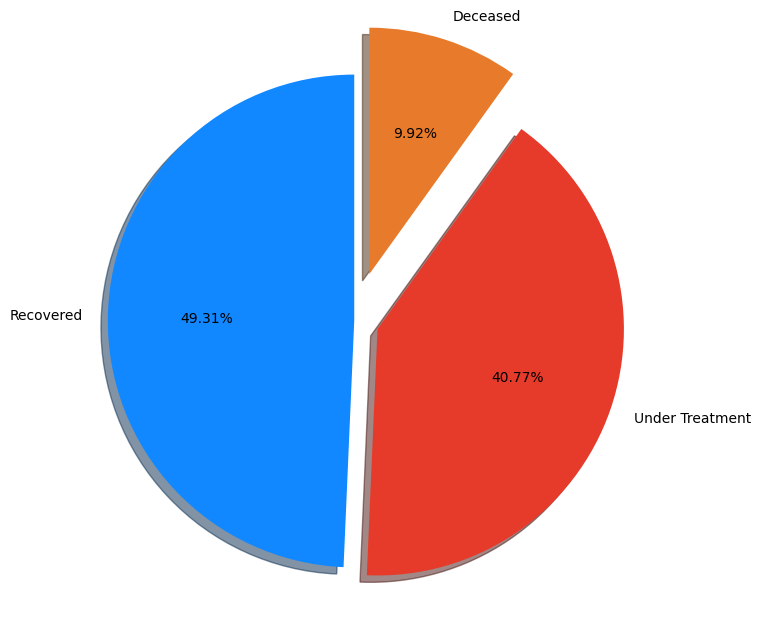

In [152]:

percentage = df2.Outcome.value_counts(normalize=True)*100
labels = ["Recovered","Under Treatment","Deceased"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1,0.2)
colors = ['#1188ff','#e63a2a','#e77a2b']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

<Axes: xlabel='Outcome'>

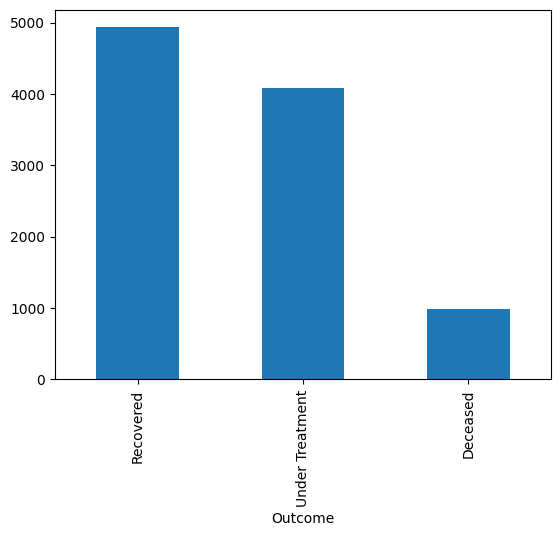

In [154]:
df2['Outcome'].value_counts().plot(kind='bar')

In [155]:

df2.head(2)

,Age,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Smoking_Status,Ethnicity,Weight,Height
0,69,Female,Emirati,Umm Al Quwain,Liver,II,Radiation,Sheikh Khalifa Hospital,Dr. VO41,Recovered,Non-Smoker,European,61,157
1,32,Male,Emirati,Umm Al Quwain,Leukemia,III,Surgery,Dubai Hospital,Dr. SM31,Recovered,Smoker,South Asian,80,175


In [156]:

df2.drop(['Primary_Physician'],axis=1,inplace=True)

In [157]:

ohe_encoder = ['Emirate','Cancer_Type','Cancer_Stage','Treatment_Type','Hospital','Smoking_Status','Ethnicity']
label_encoder = ['Gender','Nationality']
numerical = ['Age','Weight','Height']

In [158]:

X = df2.drop(['Outcome'],axis=1)
y = df2['Outcome']

In [183]:

ohe_encoder = ['Emirate','Cancer_Type','Treatment_Type','Hospital','Smoking_Status','Ethnicity']
label_encoder = ['Gender','Nationality','Cancer_Stage']
numerical = ['Age','Weight','Height']

one_encoder = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()


preprocessing = ColumnTransformer([
    ('oneHotEncoder',one_encoder,ohe_encoder),
    ("LabelEncoder",ordinal_encoder,label_encoder),
    ('numerical',scaler,numerical)
])


In [184]:

x = preprocessing.fit_transform(X_res)

In [185]:

x

array([[ 0.        ,  0.        ,  0.        , ...,  0.73954461,
        -0.56897954, -1.21905047],
       [ 0.        ,  0.        ,  0.        , ..., -1.04312248,
         0.70441159,  0.55100403],
       [ 0.        ,  0.        ,  0.        , ...,  1.70314844,
        -1.30620598,  0.55100403],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.04312248,
        -1.10514422,  1.43603128],
       [ 0.        ,  0.        ,  1.        , ...,  0.59500403,
         1.91078213,  0.35433131],
       [ 0.        ,  0.        ,  0.        , ...,  1.07680595,
        -0.03281485, -0.1373505 ]])

In [186]:

x_train,x_test,y_train,y_test = train_test_split(x,y_res,test_size=0.2,random_state=42)

In [187]:

y_train

8642     Under Treatment
9754     Under Treatment
11750           Deceased
2507     Under Treatment
3208     Under Treatment
              ...       
5191           Recovered
13418           Deceased
5390           Recovered
860            Recovered
7270           Recovered
Name: Outcome, Length: 11834, dtype: object

In [188]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_test

array([2, 0, 0, ..., 2, 2, 2])

In [190]:
le = LabelEncoder()
y_res_label = le.fit_transform(y_res)
y_res_label

array([1, 1, 2, ..., 2, 2, 2])

In [189]:

random = RandomForestClassifier()
random.fit(x_train,y_train)
y_pred = random.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7259209192294694

In [191]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [192]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average='macro') # Calculate F1-score
    precision = precision_score(true, predicted,average='macro') # Calculate Precision
    recall = recall_score(true, predicted,average='macro')  # Calculate Recall

    return acc, f1 , precision, recall

In [193]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [194]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        #auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [195]:
base_model_report =evaluate_models(X=x, y=y_res_label, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7151
- F1 score: 0.7146
- Precision: 0.7142
- Recall: 0.7154


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6718
- F1 score: 0.6581
- Precision: 0.6561
- Recall: 0.6732


Gradient Boosting
Model performance for Training set
- Accuracy: 0.5114
- F1 score: 0.5108
- Precision: 0.5105
- Recall: 0.5113
----------------------------------
Model performance for Test set
- Accuracy: 0.4343
- F1 score: 0.4346
- Precision: 0.4347
- Recall: 0.4346


Logistic Regression
Model performance for Training set
- Accuracy: 0.3684
- F1 score: 0.3649
- Precision: 0.3670
- Recall: 0.3684
----------------------------------
Model performance for Test set

# Next Technique

In [159]:

from imblearn.over_sampling import RandomOverSampler

random_over = RandomOverSampler()
X_res,y_res = random_over.fit_resample(X,y)


In [161]:

X_res.shape

(14793, 12)

In [163]:
y_res.value_counts()

Outcome
Recovered          4931
Under Treatment    4931
Deceased           4931
Name: count, dtype: int64

In [167]:
ohe = OneHotEncoder()
encoded_by_one = ohe.fit_transform(X_res[['Gender','Nationality','Emirate','Cancer_Type','Cancer_Stage','Treatment_Type','Hospital','Smoking_Status','Ethnicity']]).toarray()
encoded_by_one

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [170]:

encoded_df = pd.DataFrame(encoded_by_one,columns=ohe.get_feature_names_out())


In [171]:

X_res.head(2)

,Age,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Smoking_Status,Ethnicity,Weight,Height
0,69,Female,Emirati,Umm Al Quwain,Liver,II,Radiation,Sheikh Khalifa Hospital,Non-Smoker,European,61,157
1,32,Male,Emirati,Umm Al Quwain,Leukemia,III,Surgery,Dubai Hospital,Smoker,South Asian,80,175


In [173]:

x_numerical = X_res[['Age','Weight','Height']]

In [175]:

final_df = pd.concat([encoded_df,x_numerical],axis=1)


In [176]:

final_df.head(2)

,Gender_Female,Gender_Male,Gender_Other,Nationality_Emirati,Nationality_Expatriate,Emirate_Abu Dhabi,Emirate_Ajman,Emirate_Dubai,Emirate_Fujairah,Emirate_Ras Al Khaimah,...,Smoking_Status_Non-Smoker,Smoking_Status_Smoker,Ethnicity_African,Ethnicity_Arab,Ethnicity_East Asian,Ethnicity_European,Ethnicity_South Asian,Age,Weight,Height
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69,61,157
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,32,80,175


In [177]:

scaler = StandardScaler()
final_scaler_df = scaler.fit_transform(final_df)


In [179]:

le =LabelEncoder()
y_res_label = le.fit_transform(y_res)
y_res_label

array([1, 1, 2, ..., 2, 2, 2])

In [197]:

x_train,x_test,y_train,y_test = train_test_split(final_scaler_df,y_res_label,test_size=0.2,random_state=42)

In [198]:

random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
accuracy_score(y_test,y_pred)

0.7164582629266644